In [1]:
!pip install -Uqq fastbook
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 3.3 MB/s eta 0:00:00


In [2]:
from fastai.data.external import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *
from fastdownload.core import *

In [3]:
results = search_images_ddg("Thor amboinensis", max_images=150)

In [4]:
print(len(results))

150


In [5]:
print(results[1])

https://www.meerwasser-lexikon.de/img2/28922_zDqudJqWda.jpg


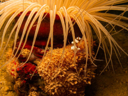

In [6]:
dest = "images/sexy_shrimp.png"
download_url(results[3], dest=dest)

im = Image.open(dest)
im.to_thumb(128)


In [8]:
shrimpType = {"Thor amboinensis", "neocaridina davidi red cherry", "Atya gabonensis", "Lysmata amboinensis"}
path = Path("shrimp")

if not path.exists() :
  path.mkdir()
for shrimp in shrimpType :
  dest = path/shrimp
  dest.mkdir(exist_ok=True)
  results = search_images_ddg(shrimp, 100)
  download_images(dest, urls=results)
  print(dest, len(results))



shrimp/Thor amboinensis 100
shrimp/neocaridina davidi red cherry 100
shrimp/Lysmata amboinensis 100
shrimp/Atya gabonensis 100


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
failed

(#1) [Path('shrimp/neocaridina davidi red cherry/a3e3ffaa-360e-4a0b-93a8-d4ce89aa42d6.jpg')]

In [34]:
shrimps = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(valid_pct=0.2, seed=69), get_y=parent_label, item_tfms=Resize(128, ResizeMethod.Crop))
dls = shrimps.dataloaders(path)

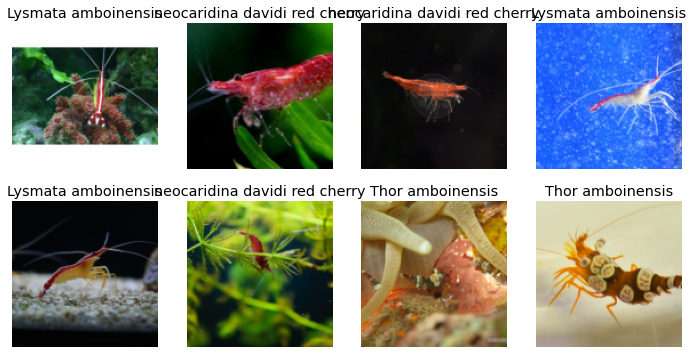

In [35]:
dls.show_batch(max_n=8)

In [36]:
shrimps = shrimps.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = shrimps.dataloaders(path)

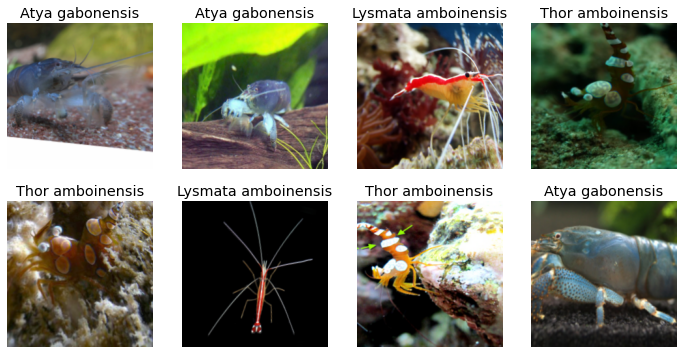

In [24]:
dls.show_batch(max_n=8)

In [37]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [38]:
learn.fine_tune(4)

In [ ]:
uploader = widgets.FileUpload()
uploader

In [ ]:
uploader = SimpleNamespace(data = ['images/my_shrimp.png'])

In [ ]:
img = PILImage.create(uploader.data[0])
learn.predict(img)

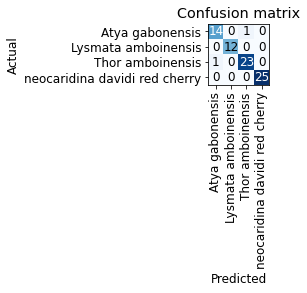

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

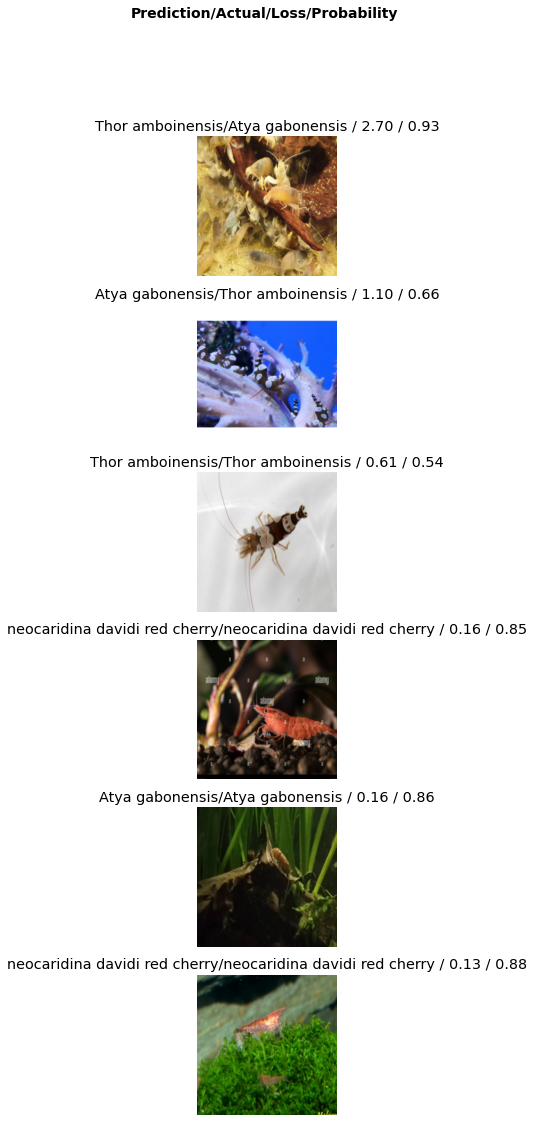

In [40]:
interp.plot_top_losses(6, nrows=6)

In [30]:
from torchvision.models.vision_transformer import ImageClassification
cleaner = ImageClassifierCleaner(learn)
cleaner

In [31]:
import shutil

for i in cleaner.delete() :
  cleaner.fns[i].unlink()

for i, cat in cleaner.change() :
  shutil.move(str(cleaner.fns[i]), path.cat)

In [41]:
learn.export()

In [43]:
!ls -la

total 45892
drwxr-xr-x 1 root root     4096 Jan 14 21:48 .
drwxr-xr-x 1 root root     4096 Jan 14 21:29 ..
drwxr-xr-x 4 root root     4096 Jan  9 14:35 .config
-rw-r--r-- 1 root root 46965519 Jan 14 21:48 export.pkl
drwxr-xr-x 2 root root     4096 Jan 14 21:30 images
drwxr-xr-x 1 root root     4096 Jan  9 14:36 sample_data
drwxr-xr-x 6 root root     4096 Jan 14 21:31 shrimp
